# Data visualization of incidents in Barcelona's neighborhoods 2019

#### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


#### Obtain neighborhood database with coordinates

In [2]:
import types
from botocore.client import Config
import ibm_boto3

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
body = client_335529e8571343eaa4cecdd51c945c46.get_object(Bucket='capstoneproject-donotdelete-pr-q6jyeyrogmggrb',Key='neighborhoods_coordinates_barcelona.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_coordinates = pd.read_csv(body)
df_coordinates.head()

,Neighborhood Code,Neighborhood,District Code,Disctrict,Neighborhood Latitude,Neighborhood Longitude
0,1,el Raval,1,Ciutat Vella,41.379518,2.168368
1,2,el Barri Gòtic,1,Ciutat Vella,41.383395,2.176912
2,3,la Barceloneta,1,Ciutat Vella,41.380653,2.189927
3,4,"Sant Pere, Santa Caterina i la Ribera",1,Ciutat Vella,41.372251,2.177531
4,5,el Fort Pienc,2,Eixample,41.395925,2.182325


#### Removed columns from df_coordinates

In [5]:
new_columns = ['Neighborhood Code', 'Neighborhood Latitude', 'Neighborhood Longitude']
df_coordinates = df_coordinates.loc[:, new_columns]
df_coordinates.head()

,Neighborhood Code,Neighborhood Latitude,Neighborhood Longitude
0,1,41.379518,2.168368
1,2,41.383395,2.176912
2,3,41.380653,2.189927
3,4,41.372251,2.177531
4,5,41.395925,2.182325


## Clean Data

#### Import 

In [6]:
def __iter__(self): return 0

body = client_335529e8571343eaa4cecdd51c945c46.get_object(Bucket='capstoneproject-donotdelete-pr-q6jyeyrogmggrb',Key='2019_incidents_gestionats_gub.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Codi_Incident,Descripcio_Incident,Codi_districte,Nom_districte,Codi_barri,Nom_barri,NK_Any,Mes_any,Nom_mes,Numero_incidents_GUB
0,410,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,6.0,Gràcia,31,la Vila de Gràcia,2019.0,1,Gener,85.0
1,210,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,10.0,Sant Martí,73,la Verneda i la Pau,2019.0,4,Abril,4.0
2,200,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,2.0,Eixample,9,la Nova Esquerra de l'Eixample,2019.0,4,Abril,12.0
3,400,CONVIVÈNCIA VEINAL ...,6.0,Gràcia,31,la Vila de Gràcia,2019.0,4,Abril,105.0
4,670,AGRESSIONS ...,1.0,Ciutat Vella,3,la Barceloneta,2019.0,1,Gener,12.0


#### Select needed columns

In [7]:
df.columns

Index(['Codi_Incident', 'Descripcio_Incident', 'Codi_districte',
       'Nom_districte', 'Codi_barri', 'Nom_barri', 'NK_Any', 'Mes_any',
       'Nom_mes', 'Numero_incidents_GUB'],
      dtype='object')

In [8]:
new_columns = ['Descripcio_Incident', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Mes_any', 'Numero_incidents_GUB']
df = df.loc[:, new_columns]
df.head()

,Descripcio_Incident,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Mes_any,Numero_incidents_GUB
0,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,6.0,Gràcia,31,la Vila de Gràcia,1,85.0
1,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,10.0,Sant Martí,73,la Verneda i la Pau,4,4.0
2,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,2.0,Eixample,9,la Nova Esquerra de l'Eixample,4,12.0
3,CONVIVÈNCIA VEINAL ...,6.0,Gràcia,31,la Vila de Gràcia,4,105.0
4,AGRESSIONS ...,1.0,Ciutat Vella,3,la Barceloneta,1,12.0


In [9]:
df.dtypes

Descripcio_Incident      object
Codi_districte          float64
Nom_districte            object
Codi_barri                int64
Nom_barri                object
Mes_any                  object
Numero_incidents_GUB    float64
dtype: object

#### Change columns names

In [10]:
new_columns_name_dict = {'Descripcio_Incident': 'Incident', 'Codi_barri': 'Neighborhood Code', 'Nom_barri': 'Neighborhood', 'Codi_districte': 'District Code', 'Nom_districte': 'Disctrict', 'Mes_any' : 'Month', 'Numero_incidents_GUB': 'Number of Incidents'}
df.rename(columns=new_columns_name_dict, inplace=True)
df.head()

,Incident,District Code,Disctrict,Neighborhood Code,Neighborhood,Month,Number of Incidents
0,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,6.0,Gràcia,31,la Vila de Gràcia,1,85.0
1,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,10.0,Sant Martí,73,la Verneda i la Pau,4,4.0
2,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,2.0,Eixample,9,la Nova Esquerra de l'Eixample,4,12.0
3,CONVIVÈNCIA VEINAL ...,6.0,Gràcia,31,la Vila de Gràcia,4,105.0
4,AGRESSIONS ...,1.0,Ciutat Vella,3,la Barceloneta,1,12.0


In [11]:
df.shape

(33856, 7)

In [12]:
df["Neighborhood"].unique()

array(['la Vila de Gràcia', 'la Verneda i la Pau',
       "la Nova Esquerra de l'Eixample", 'la Barceloneta',
       "la Dreta de l'Eixample", 'el Poble-sec', 'la Prosperitat',
       'Provençals del Poblenou', 'Sants', 'Navas', 'el Poblenou',
       'el Raval', 'Vilapicina i la Torre Llobeta', 'Baró de Viver',
       'la Vila Olímpica del Poblenou', 'Porta', 'Sants - Badal',
       'la Sagrada Família', 'Sarrià', 'Sant Antoni', 'la Marina de Port',
       'la Sagrera', 'el Coll', 'Sant Andreu', 'el Turó de la Peira',
       'Hostafrancs', 'el Putxet i el Farró', 'el Barri Gòtic',
       "el Camp de l'Arpa del Clot", 'Vallcarca i els Penitents',
       'el Clot', 'la Bordeta', "la Font d'en Fargues",
       'Sant Genís dels Agudells', 'el Congrés i els Indians',
       'les Roquetes', 'el Besòs i el Maresme', 'Verdun', 'la Guineueta',
       'les Tres Torres', 'el Carmel', 'Torre Baró', 'les Corts',
       'Sant Pere, Santa Caterina i la Ribera',
       'Sant Gervasi - la Bonanova', 'S

#### Removed NaN and Desconegut from Neighborhood Column

In [13]:
# Get names of indexes for which column Age has value 30
indexNames = df[df['Neighborhood'] == 'Desconegut'].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [14]:
df = df.dropna(subset=['Neighborhood'], axis=0).reset_index(drop=True)

In [15]:
df["Neighborhood"].unique()

array(['la Vila de Gràcia', 'la Verneda i la Pau',
       "la Nova Esquerra de l'Eixample", 'la Barceloneta',
       "la Dreta de l'Eixample", 'el Poble-sec', 'la Prosperitat',
       'Provençals del Poblenou', 'Sants', 'Navas', 'el Poblenou',
       'el Raval', 'Vilapicina i la Torre Llobeta', 'Baró de Viver',
       'la Vila Olímpica del Poblenou', 'Porta', 'Sants - Badal',
       'la Sagrada Família', 'Sarrià', 'Sant Antoni', 'la Marina de Port',
       'la Sagrera', 'el Coll', 'Sant Andreu', 'el Turó de la Peira',
       'Hostafrancs', 'el Putxet i el Farró', 'el Barri Gòtic',
       "el Camp de l'Arpa del Clot", 'Vallcarca i els Penitents',
       'el Clot', 'la Bordeta', "la Font d'en Fargues",
       'Sant Genís dels Agudells', 'el Congrés i els Indians',
       'les Roquetes', 'el Besòs i el Maresme', 'Verdun', 'la Guineueta',
       'les Tres Torres', 'el Carmel', 'Torre Baró', 'les Corts',
       'Sant Pere, Santa Caterina i la Ribera',
       'Sant Gervasi - la Bonanova', 'S

#### Change columns types

In [16]:
df = df.astype({'District Code': 'int64', 'Number of Incidents': 'int64'})

In [17]:
df.dtypes

Incident               object
District Code           int64
Disctrict              object
Neighborhood Code       int64
Neighborhood           object
Month                  object
Number of Incidents     int64
dtype: object

#### Add the coordinates to the existing data frame

In [18]:
# Merge both data frames so all the neighborhoods have their coordinates
df = pd.merge(df, df_coordinates, how='left', on='Neighborhood Code')
df.head()

,Incident,District Code,Disctrict,Neighborhood Code,Neighborhood,Month,Number of Incidents,Neighborhood Latitude,Neighborhood Longitude
0,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,6,Gràcia,31,la Vila de Gràcia,1,85,41.403178,2.157166
1,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,10,Sant Martí,73,la Verneda i la Pau,4,4,41.423220,2.202940
2,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,2,Eixample,9,la Nova Esquerra de l'Eixample,4,12,41.382816,2.149966
3,CONVIVÈNCIA VEINAL ...,6,Gràcia,31,la Vila de Gràcia,4,105,41.403178,2.157166
4,AGRESSIONS ...,1,Ciutat Vella,3,la Barceloneta,1,12,41.380653,2.189927


In [19]:
df.shape

(33163, 9)

In [20]:
df = df.dropna(subset=['Neighborhood Latitude'], axis=0).reset_index(drop=True)
df.head()

,Incident,District Code,Disctrict,Neighborhood Code,Neighborhood,Month,Number of Incidents,Neighborhood Latitude,Neighborhood Longitude
0,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,6,Gràcia,31,la Vila de Gràcia,1,85,41.403178,2.157166
1,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,10,Sant Martí,73,la Verneda i la Pau,4,4,41.423220,2.202940
2,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,2,Eixample,9,la Nova Esquerra de l'Eixample,4,12,41.382816,2.149966
3,CONVIVÈNCIA VEINAL ...,6,Gràcia,31,la Vila de Gràcia,4,105,41.403178,2.157166
4,AGRESSIONS ...,1,Ciutat Vella,3,la Barceloneta,1,12,41.380653,2.189927


In [21]:
df.shape

(33163, 9)

#### Convert Month column in one column for each month

In [22]:
# Turning categorical variables into quantitative variables
dummy_variable = pd.get_dummies(df['Month'])

In [23]:
# Concat new columns
# merge data frame "df" and "dummy_variable_1" 
df_incidents_months = pd.concat([df, dummy_variable], axis=1)

# Drop original Month column
df_incidents_months.drop('Month', axis = 1, inplace=True)
df_incidents_months.head()

,Incident,District Code,Disctrict,Neighborhood Code,Neighborhood,Number of Incidents,Neighborhood Latitude,Neighborhood Longitude,1,10,11,12,2,3,4,5,6,7,8,9
0,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,6,Gràcia,31,la Vila de Gràcia,85,41.403178,2.157166,1,0,0,0,0,0,0,0,0,0,0,0
1,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,10,Sant Martí,73,la Verneda i la Pau,4,41.423220,2.202940,0,0,0,0,0,0,1,0,0,0,0,0
2,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,2,Eixample,9,la Nova Esquerra de l'Eixample,12,41.382816,2.149966,0,0,0,0,0,0,1,0,0,0,0,0
3,CONVIVÈNCIA VEINAL ...,6,Gràcia,31,la Vila de Gràcia,105,41.403178,2.157166,0,0,0,0,0,0,1,0,0,0,0,0
4,AGRESSIONS ...,1,Ciutat Vella,3,la Barceloneta,12,41.380653,2.189927,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Order Months columns
column_order = ['District Code', 'Disctrict', 'Neighborhood Code', 'Neighborhood', 'Incident', 'Number of Incidents', 'Neighborhood Latitude', 'Neighborhood Longitude', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df_incidents_months = df_incidents_months.reindex(columns=column_order)
df_incidents_months.head()

,District Code,Disctrict,Neighborhood Code,Neighborhood,Incident,Number of Incidents,Neighborhood Latitude,Neighborhood Longitude,1,2,3,4,5,6,7,8,9,10,11,12
0,6,Gràcia,31,la Vila de Gràcia,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,85,41.403178,2.157166,1,0,0,0,0,0,0,0,0,0,0,0
1,10,Sant Martí,73,la Verneda i la Pau,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,4,41.423220,2.202940,0,0,0,1,0,0,0,0,0,0,0,0
2,2,Eixample,9,la Nova Esquerra de l'Eixample,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,12,41.382816,2.149966,0,0,0,1,0,0,0,0,0,0,0,0
3,6,Gràcia,31,la Vila de Gràcia,CONVIVÈNCIA VEINAL ...,105,41.403178,2.157166,0,0,0,1,0,0,0,0,0,0,0,0
4,1,Ciutat Vella,3,la Barceloneta,AGRESSIONS ...,12,41.380653,2.189927,1,0,0,0,0,0,0,0,0,0,0,0


#### Add the number of incidents to the months columns

In [25]:
number_incidents_month = df_incidents_months[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].multiply(df_incidents_months['Number of Incidents'], axis="index")

In [26]:
number_incidents_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,85,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,4,0,0,0,0,0,0,0,0
2,0,0,0,12,0,0,0,0,0,0,0,0
3,0,0,0,105,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df_incidents_months.drop(['Number of Incidents', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], axis = 1, inplace=True)
df_incidents_months.head()

,District Code,Disctrict,Neighborhood Code,Neighborhood,Incident,Neighborhood Latitude,Neighborhood Longitude
0,6,Gràcia,31,la Vila de Gràcia,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,41.403178,2.157166
1,10,Sant Martí,73,la Verneda i la Pau,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,41.423220,2.202940
2,2,Eixample,9,la Nova Esquerra de l'Eixample,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,41.382816,2.149966
3,6,Gràcia,31,la Vila de Gràcia,CONVIVÈNCIA VEINAL ...,41.403178,2.157166
4,1,Ciutat Vella,3,la Barceloneta,AGRESSIONS ...,41.380653,2.189927


In [28]:
df_incidents_months = pd.concat([df_incidents_months, number_incidents_month], axis=1)
df_incidents_months.head()

,District Code,Disctrict,Neighborhood Code,Neighborhood,Incident,Neighborhood Latitude,Neighborhood Longitude,1,2,3,4,5,6,7,8,9,10,11,12
0,6,Gràcia,31,la Vila de Gràcia,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,41.403178,2.157166,85,0,0,0,0,0,0,0,0,0,0,0
1,10,Sant Martí,73,la Verneda i la Pau,ACCIDENTS DE TRÀNSIT SENSE FERITS ...,41.423220,2.202940,0,0,0,4,0,0,0,0,0,0,0,0
2,2,Eixample,9,la Nova Esquerra de l'Eixample,INCIDÈNCIES AMB AFECTACIÓ DE VIA ...,41.382816,2.149966,0,0,0,12,0,0,0,0,0,0,0,0
3,6,Gràcia,31,la Vila de Gràcia,CONVIVÈNCIA VEINAL ...,41.403178,2.157166,0,0,0,105,0,0,0,0,0,0,0,0
4,1,Ciutat Vella,3,la Barceloneta,AGRESSIONS ...,41.380653,2.189927,12,0,0,0,0,0,0,0,0,0,0,0


#### Sum all the incidents by neighborhood

In [29]:
df_neigh_sum = df_incidents_months.drop(['Incident'], axis=1)
df_neigh_sum.head()

,District Code,Disctrict,Neighborhood Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,1,2,3,4,5,6,7,8,9,10,11,12
0,6,Gràcia,31,la Vila de Gràcia,41.403178,2.157166,85,0,0,0,0,0,0,0,0,0,0,0
1,10,Sant Martí,73,la Verneda i la Pau,41.423220,2.202940,0,0,0,4,0,0,0,0,0,0,0,0
2,2,Eixample,9,la Nova Esquerra de l'Eixample,41.382816,2.149966,0,0,0,12,0,0,0,0,0,0,0,0
3,6,Gràcia,31,la Vila de Gràcia,41.403178,2.157166,0,0,0,105,0,0,0,0,0,0,0,0
4,1,Ciutat Vella,3,la Barceloneta,41.380653,2.189927,12,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df_neigh_sum = df_incidents_months.groupby(['Neighborhood'])[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].agg('sum')
df_neigh_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Neighborhood,,,,,,,,,,,,
Baró de Viver,60,54,41,34,41,53,30,36,37,38,23,25
Can Baró,74,93,111,96,81,87,113,106,91,93,93,113
Can Peguera,46,39,48,35,33,36,50,42,49,40,32,37
Canyelles,55,57,40,50,60,68,79,64,64,59,54,52
Ciutat Meridiana,183,138,142,137,166,169,185,160,152,176,129,114


In [31]:
df_neigh_sum['Total'] = df_neigh_sum.sum(axis=1)
df_neigh_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Total
Neighborhood,,,,,,,,,,,,,
Baró de Viver,60,54,41,34,41,53,30,36,37,38,23,25,472
Can Baró,74,93,111,96,81,87,113,106,91,93,93,113,1151
Can Peguera,46,39,48,35,33,36,50,42,49,40,32,37,487
Canyelles,55,57,40,50,60,68,79,64,64,59,54,52,702
Ciutat Meridiana,183,138,142,137,166,169,185,160,152,176,129,114,1851


In [32]:
df_neigh_sum.sort_values(by='Total', ascending = False, inplace=True)
df_neigh_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Total
Neighborhood,,,,,,,,,,,,,
el Raval,1887,1825,2161,2158,2338,2302,2428,2242,2317,2223,1940,1877,25698
la Dreta de l'Eixample,1636,1685,1719,1585,1719,1718,2117,1684,1646,2035,1451,1547,20542
el Barri Gòtic,1330,1381,1523,1593,1685,1776,1832,1697,1669,1534,1207,1312,18539
el Poble-sec,814,828,1002,993,1143,1251,1338,993,1199,1039,900,899,12399
la Vila de Gràcia,795,838,916,915,1076,1095,1198,1279,980,920,841,902,11755


#### Sum all the incidents by Incident and neighborhood

In [33]:
df_incidentsby_neigh_sum = df_incidents_months.groupby(['Neighborhood','Incident'])[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].agg('sum')
df_incidentsby_neigh_sum.head()

1  2  3  4  \
Neighborhood  Incident                                                         
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...  0  0  0  1   
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...  0  0  1  3   
              ACTES CONTRA LA PROPIETAT PRIVADA              ...  1  0  0  2   
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...  1  0  0  0   
              ACTIVITAT AMB PRESOS                           ...  0  0  0  0   

                                                                  5  6  7  8  \
Neighborhood  Incident                                                         
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...  0  2  1  1   
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...  1  0  0  0   
              ACTES CONTRA LA PROPIETAT PRIVADA              ...  0  2  2  0   
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...  0  0  0  0   
              ACTIVITAT AMB PRESOS                           ...  0  1  0  0   

                                                                  9  10  11  \
Neighborhood  Incident                                                        
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...  0   2   0   
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...  1   1   0   
              ACTES CONTRA LA PROPIETAT PRIVADA              ...  2   2   1   
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...  0   0   0   
              ACTIVITAT AMB PRESOS                           ...  0   0   0   

                                                                  12  
Neighborhood  Incident                                                
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...   0  
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...   0  
              ACTES CONTRA LA PROPIETAT PRIVADA              ...   0  
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...   0  
              ACTIVITAT AMB PRESOS                           ...   0

In [34]:
df_incidentsby_neigh_sum['Total'] = df_incidentsby_neigh_sum.sum(axis=1)
df_incidentsby_neigh_sum.head()

1  2  3  4  \
Neighborhood  Incident                                                         
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...  0  0  0  1   
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...  0  0  1  3   
              ACTES CONTRA LA PROPIETAT PRIVADA              ...  1  0  0  2   
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...  1  0  0  0   
              ACTIVITAT AMB PRESOS                           ...  0  0  0  0   

                                                                  5  6  7  8  \
Neighborhood  Incident                                                         
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...  0  2  1  1   
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...  1  0  0  0   
              ACTES CONTRA LA PROPIETAT PRIVADA              ...  0  2  2  0   
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...  0  0  0  0   
              ACTIVITAT AMB PRESOS                           ...  0  1  0  0   

                                                                  9  10  11  \
Neighborhood  Incident                                                        
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...  0   2   0   
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...  1   1   0   
              ACTES CONTRA LA PROPIETAT PRIVADA              ...  2   2   1   
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...  0   0   0   
              ACTIVITAT AMB PRESOS                           ...  0   0   0   

                                                                  12  Total  
Neighborhood  Incident                                                       
Baró de Viver ACCIDENTS DE TRÀNSIT AMB FERITS                ...   0      7  
              ACCIDENTS DE TRÀNSIT SENSE FERITS              ...   0      7  
              ACTES CONTRA LA PROPIETAT PRIVADA              ...   0     12  
              ACTES CONTRA LA PROPIETAT PÚBLICA              ...   0      1  
              ACTIVITAT AMB PRESOS                           ...   0      1

In [35]:
df_incidentsby_neigh_sum.sort_values(by='Total', ascending = False, inplace=True)
df_incidentsby_neigh_sum.head()

1    2  \
Neighborhood   Incident                                                       
el Raval       VIGILÀNCIA POLICIAL                            ...  399  350   
               ACTES CONTRA LA PROPIETAT PRIVADA              ...  291  260   
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  120  134   
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  147  117   
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...  256  260   

                                                                     3    4  \
Neighborhood   Incident                                                       
el Raval       VIGILÀNCIA POLICIAL                            ...  317  315   
               ACTES CONTRA LA PROPIETAT PRIVADA              ...  283  298   
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  203  230   
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  200  218   
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...  236  259   

                                                                     5    6  \
Neighborhood   Incident                                                       
el Raval       VIGILÀNCIA POLICIAL                            ...  353  331   
               ACTES CONTRA LA PROPIETAT PRIVADA              ...  301  288   
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  237  317   
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  245  249   
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...  264  195   

                                                                     7    8  \
Neighborhood   Incident                                                       
el Raval       VIGILÀNCIA POLICIAL                            ...  283  274   
               ACTES CONTRA LA PROPIETAT PRIVADA              ...  247  216   
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  356  257   
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  307  246   
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...  213  196   

                                                                     9   10  \
Neighborhood   Incident                                                       
el Raval       VIGILÀNCIA POLICIAL                            ...  306  341   
               ACTES CONTRA LA PROPIETAT PRIVADA              ...  250  200   
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  253  259   
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  269  240   
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...  196  138   

                                                                    11   12  \
Neighborhood   Incident                                                       
el Raval       VIGILÀNCIA POLICIAL                            ...  356  275   
               ACTES CONTRA LA PROPIETAT PRIVADA              ...  185  169   
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  143  136   
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...  191  167   
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...  124  148   

                                                                   Total  
Neighborhood   Incident                                                   
el Raval       VIGILÀNCIA POLICIAL                            ...   3900  
               ACTES CONTRA LA PROPIETAT PRIVADA              ...   2988  
el Barri Gòtic ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...   2645  
el Raval       ACTIVITATS MOLESTES EN ESPAIS PÚBLICS          ...   2596  
el Barri Gòtic ACTES CONTRA LA PROPIETAT PRIVADA              ...   2485

#### Count of incidents

In [36]:
df_incidents_sum = df_incidents_months.groupby(['Incident'])[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].agg('sum')
df_incidents_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Incident,,,,,,,,,,,,
ABOCAMENT DE RESIDUS,47,49,45,55,52,64,63,45,58,61,58,59
ACCIDENTS DE TRANSIT AMB MATERIES PERILLOSSES,1,0,0,1,0,0,0,0,0,0,1,0
ACCIDENTS DE TRÀNSIT AMB FERITS,1004,905,1015,1006,1084,966,1133,759,931,1141,991,925
ACCIDENTS DE TRÀNSIT SENSE FERITS,619,558,647,682,692,668,756,505,562,573,643,590
ACTES CONTRA LA PROPIETAT,0,0,0,0,0,1,0,0,0,1,1,0


In [37]:
df_incidents_sum['Total'] = df_incidents_sum.sum(axis=1)
df_incidents_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Total
Incident,,,,,,,,,,,,,
ABOCAMENT DE RESIDUS,47,49,45,55,52,64,63,45,58,61,58,59,656
ACCIDENTS DE TRANSIT AMB MATERIES PERILLOSSES,1,0,0,1,0,0,0,0,0,0,1,0,3
ACCIDENTS DE TRÀNSIT AMB FERITS,1004,905,1015,1006,1084,966,1133,759,931,1141,991,925,11860
ACCIDENTS DE TRÀNSIT SENSE FERITS,619,558,647,682,692,668,756,505,562,573,643,590,7495
ACTES CONTRA LA PROPIETAT,0,0,0,0,0,1,0,0,0,1,1,0,3


In [38]:
df_incidents_sum.sort_values(by='Total', ascending = False, inplace=True)
df_incidents_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Total
Incident,,,,,,,,,,,,,
CONVIVÈNCIA VEINAL,2445,2369,2869,2700,3079,3437,3680,3320,3266,2874,2618,2699,35356
ACTIVITATS MOLESTES EN ESPAIS PÚBLICS,1576,1567,2259,2130,2569,3552,4203,3383,3463,2688,1814,1843,31047
VIGILÀNCIA POLICIAL,2785,2829,2776,2458,2634,2354,2293,2343,2636,2680,2452,2371,30611
INFRACCIONS EN GUALS I RESERVES,2096,1926,2078,1856,2138,1942,1949,1434,2091,2096,2335,2602,24543
ACTES CONTRA LA PROPIETAT PRIVADA,1762,1706,1639,1709,1715,1664,1777,1618,1516,1255,1132,1152,18645


## Data Visual Analysis

In [39]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Visualize months vs number of incidents in each neighborhood

In [40]:
months = list(map(str, range(1, 13)))
months

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [41]:
#As there are many neighborhoods, just the 10th firts with the higher incidents rates has been displayed
df_neigh_sum_sorted=df_neigh_sum.sort_values(by='Total', ascending=False)
top_df=df_neigh_sum_sorted.head(10)
top_df=top_df.loc[top_df.index, months]
top_df=top_df.transpose()

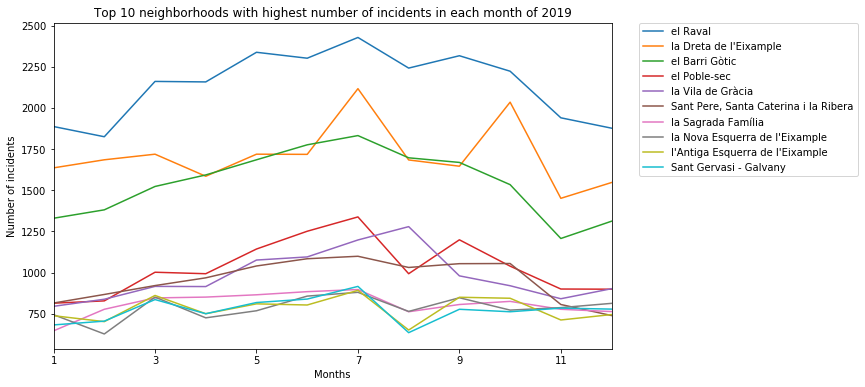

In [42]:
top_df.plot(kind='line', figsize=(10, 6))

plt.title('Top 10 neighborhoods with highest number of incidents in each month of 2019')
plt.ylabel('Number of incidents')
plt.xlabel('Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Visualize total number of incidents by neigborhood

In [43]:
df_neigh_total = df_neigh_sum.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], axis = 1)
df_neigh_total.head()

,Total
Neighborhood,
el Raval,25698
la Dreta de l'Eixample,20542
el Barri Gòtic,18539
el Poble-sec,12399
la Vila de Gràcia,11755


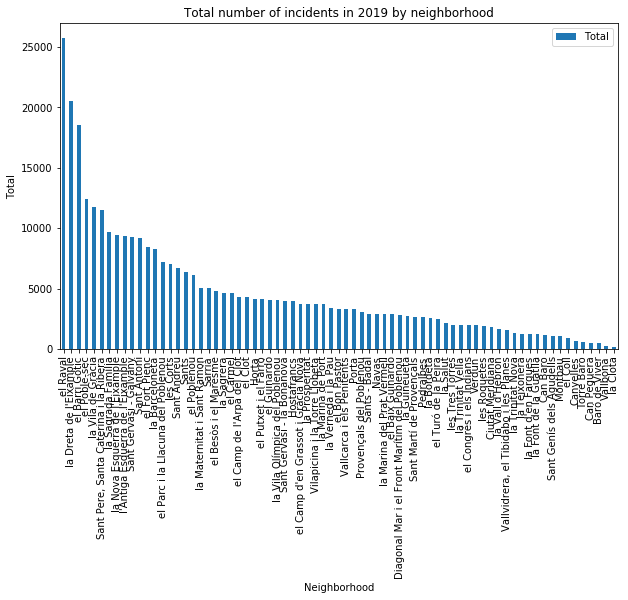

In [44]:
df_neigh_total.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood')
plt.ylabel('Total')
plt.title('Total number of incidents in 2019 by neighborhood')

plt.show()

### Visualize total number of each type of incident

In [45]:
df_incidents_total = df_incidents_sum.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], axis = 1)
df_incidents_total.head()

,Total
Incident,
CONVIVÈNCIA VEINAL,35356
ACTIVITATS MOLESTES EN ESPAIS PÚBLICS,31047
VIGILÀNCIA POLICIAL,30611
INFRACCIONS EN GUALS I RESERVES,24543
ACTES CONTRA LA PROPIETAT PRIVADA,18645


In [46]:
# Remove white space at the end of Incidents values
df_incidents_total.index = df_incidents_total.index.str.rstrip()

In [47]:
# As there are many types of incidents, just the 10th firts with the higher incidents rates has been displayed
df_incidents_total_sorted=df_incidents_total.sort_values(by='Total', ascending=False)
top_incidents_df=df_incidents_total_sorted.head(10)

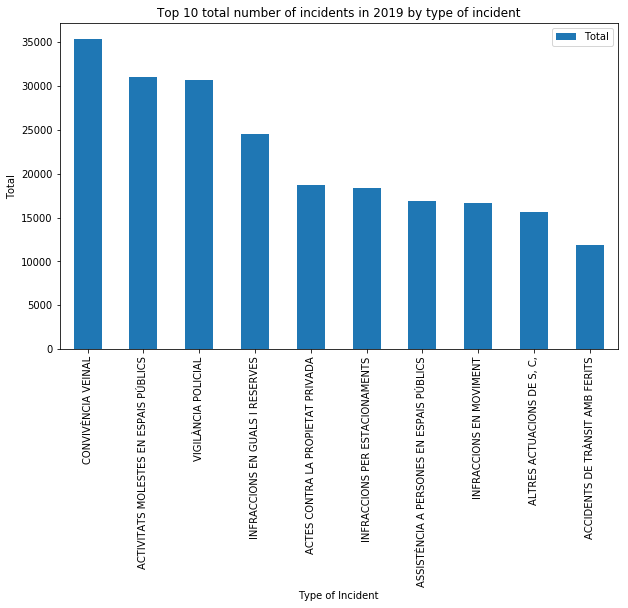

In [48]:
top_incidents_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Type of Incident')
plt.ylabel('Total')
plt.title('Top 10 total number of incidents in 2019 by type of incident')

plt.show()